<!-- Name - Humera Bano
Github Username - humera811
USC ID - 7255691039 -->

In [1035]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import arff
from turtle import title
from imghdr import tests
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
import seaborn as sns


(a)Download the Vertebral Column Data Set from:https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1054]:
input_path = "../Homework1/"
# solution with scipy.arff
data = arff.loadarff(input_path + 'data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.replace(b'Abnormal', 1, inplace=True)
df.replace(b'Normal', 0, inplace=True)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


(b)Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

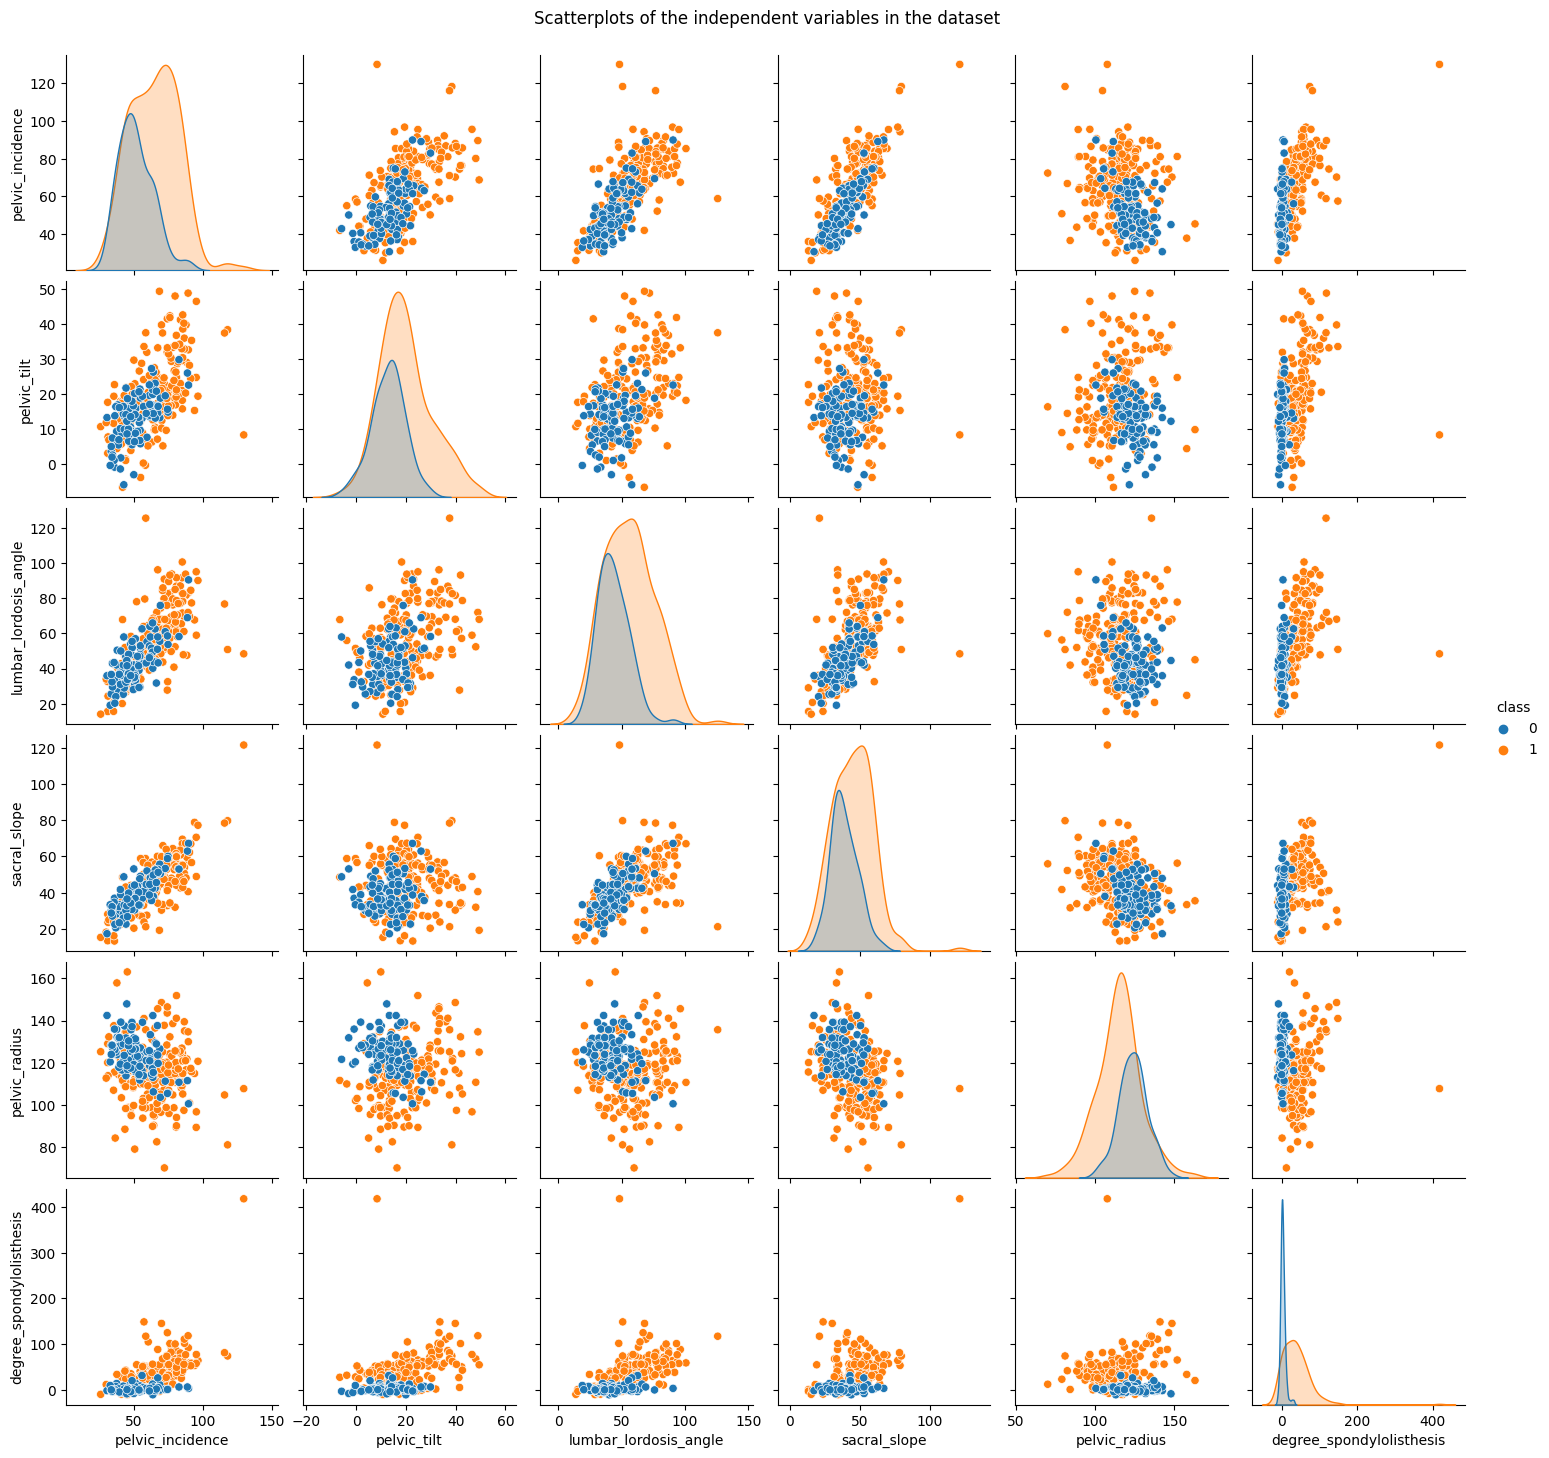

In [1037]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
#scatter plot
plot = sns.pairplot(df, hue="class", vars=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
                                                       "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"])

#add overall title
#https://www.statology.org/seaborn-title/#:~:text=To%20add%20a%20title%20to%20a%20single%20seaborn%20plot%2C%20you,set()%20function.&text=To%20add%20an%20overall%20title,suptitle()%20function.
plt.subplots_adjust(top=0.95, bottom = 0.05)
plot.fig.suptitle('Scatterplots of the independent variables in the dataset')
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

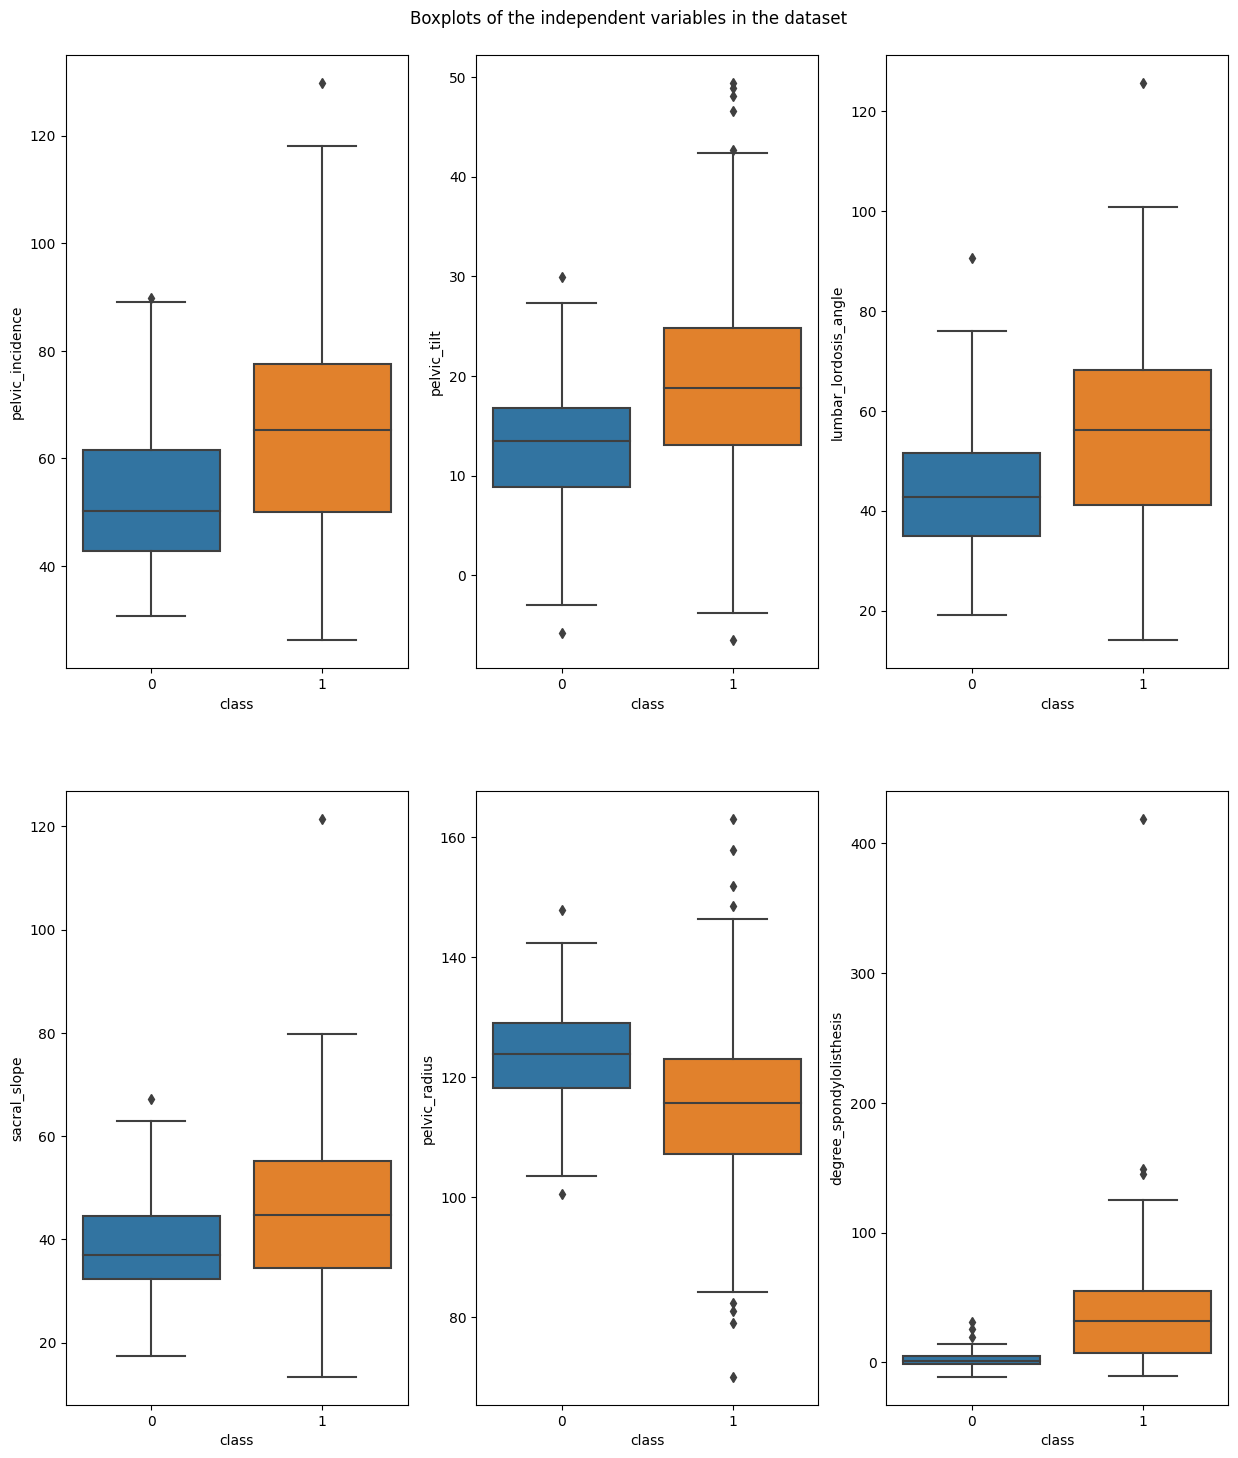

In [1038]:
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
figure, axes = plt.subplots(2, 3, sharex=False, figsize=(15, 15))
# plt.figure(figsize=(15, 15))
figure.suptitle('Boxplots of the independent variables in the dataset')
sns.boxplot(ax=axes[0, 0], x="class", y="pelvic_incidence", data=df)
sns.boxplot(ax=axes[0, 1], x="class", y="pelvic_tilt", data=df)
sns.boxplot(ax=axes[0, 2], x="class", y="lumbar_lordosis_angle", data=df)
sns.boxplot(ax=axes[1, 0], x="class", y="sacral_slope", data=df)
sns.boxplot(ax=axes[1, 1], x="class", y="pelvic_radius", data=df)
sns.boxplot(ax=axes[1, 2], x="class", y="degree_spondylolisthesis", data=df)
plt.subplots_adjust(top=0.95, bottom = 0.05)

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [1039]:
#https://www.digitalocean.com/community/tutorials/create-subset-of-python-dataframe
# trainingDataSet=(df.loc[df['class']==0].iloc[0:70]).append(df.loc[df['class']==1].iloc[0:140])
# trainingDataSet
trainingDataSet=pd.concat([df.loc[df['class']==0].iloc[0:70], df.loc[df['class']==1].iloc[0:140]])
trainingDataSet


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [1040]:
# testDataSet=(df.loc[df['class']==0].iloc[70:]).append(df.loc[df['class']==1][140:])
# testDataSet
testDataSet=pd.concat([df.loc[df['class']==0].iloc[70:],df.loc[df['class']==1].iloc[140:]])
testDataSet

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


https://seaborn.pydata.org/generated/seaborn.pairplot.html
https://www.statology.org/seaborn-title/#:~:text=To%20add%20a%20title%20to%20a%20single%20seaborn%20plot%2C%20you,set()%20function.&text=To%20add%20an%20overall%20title,suptitle()%20function.
https://seaborn.pydata.org/generated/seaborn.boxplot.html


(c) Classification using KNN on Vertebral Column Data Set   
i. Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [1041]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# splitting data into labels and features of training and test data set
x_train=trainingDataSet.iloc[0:,0:6]
y_train=trainingDataSet['class']
    
testset=testDataSet.iloc[0:,0:6]
testLabels=testDataSet['class']

neigh = neighbors.KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsClassifier()

ii Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ { 208 , 205 , . . . , 7 , 4 , 1 , } (in reverse order). You are welcome to use smaller increments of k . Which k * is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F 1 -score when k = k *2

In [1042]:
# N_jobs is used to specify the number of jobs to run in parallel
K = np.arange(208, 0, -3)

k_val = np.array([])
k_step = -3
train_error = np.array([])
test_error = np.array([])

for k in range(208, 0, k_step):
    k_val = np.append(k_val, k)
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.set_params(n_neighbors=k, metric='euclidean', p= 2)
    neigh.fit(x_train, y_train)
     
    #training set
    train_prediction = neigh.predict(x_train)
    train_accuracy = accuracy_score(y_train,train_prediction)
    train_error = np.append(train_error, (np.mean(train_prediction != y_train)))
    
    #testing set
    test_prediction = neigh.predict(testset)
    test_accuracy = accuracy_score(testLabels,test_prediction)
    test_error = np.append(test_error, (np.mean(test_prediction != testLabels)))

# # prediction test
# test_prediction = neigh.predict(testset)
# test_prediction 

Minimum Test Error Rate: 0.06
Minimum Training Error Rate: 0.0
Most suitable k of Euclidean: 4


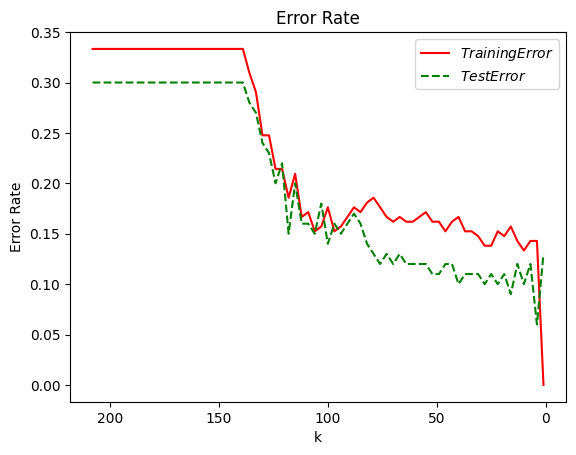

In [1043]:
#https://www.kdnuggets.com/2022/07/knearest-neighbors-scikitlearn.html
error_rate_df = pd.DataFrame(np.column_stack([k_val, train_error, test_error]), 
                             columns=['k', 'training_error', 'testing_error'])
min_val = np.min(error_rate_df.testing_error)
min_train_val = np.min(error_rate_df.training_error)
min_k = int(error_rate_df[error_rate_df['testing_error'] == min_val]['k'])
print('Minimum Test Error Rate:', min_val)
print('Minimum Training Error Rate:', min_train_val)
print('Most suitable k of Euclidean:', min_k)
#plotting the graph
# https://www.codegrepper.com/code-examples/python/plt.gca%28%29.invert_yaxis%28%29
plt.gca().invert_xaxis()
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.plot(k_val, train_error, label = '$Training Error$', color = 'red')
plt.plot(k_val, test_error,  label = '$Test Error$', linestyle='dashed', color='green')
plt.title('Error Rate')
plt.legend()
plt.show()





In [1044]:
#predicting with k = 4
k = 4
neigh.set_params(n_neighbors = k)
neigh.fit(x_train, y_train)
test_pred = neigh.predict(testset)
print(test_pred)
# Confusion Matrix
confusion_matrix = confusion_matrix(testLabels, test_pred)
# True positive rate
tn, fp, fn, tp = confusion_matrix.ravel()
tpr = tp/(tp+fn)
# True negative rate
tnr = tn/(tn+fp)
# Precision
p = precision_score(testLabels, test_pred)
# F1 Score
F1_Score = f1_score(testLabels, test_pred)
print('confusionMatrix:\n', confusion_matrix)
print('True Positive Rate:', tpr)
print('True Negative Rate:', tnr)
print('Precision:', p)
print('F1-score:', F1_Score)
#accuracy
metrics.accuracy_score(testLabels, test_pred)
#classification report
print(classification_report(testLabels,test_pred))



[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
confusionMatrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-score: 0.9583333333333333
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate3 , which is obtained by some value of k , against the size of training set, when the size of training set is N ∈ { 10 , 20 , 30 , . . . , 210 }4 . Note: for each N , select your training set by choosing the first b N/ 3 rows of Class 0 and the first N − N/ 3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from { 1 , 6 , 11 , . . . , 196 } . This plot is called a Learning Curve .

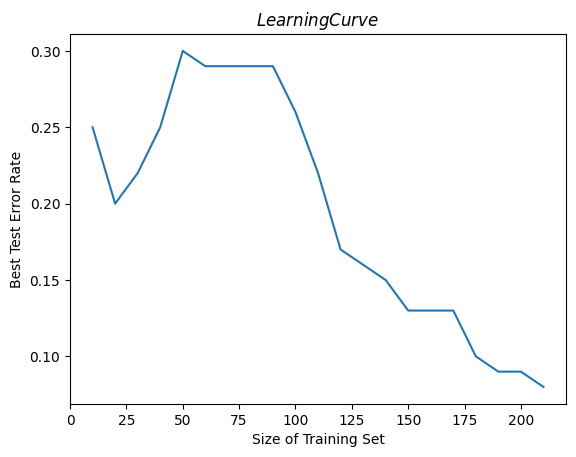

In [1045]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
N = np.arange(10, 211, 10)
test_err_opt = []

for n in N:
    class0 = n//3
    class1 = n-n//3
    truncated_train_set = pd.concat([df.loc[df['class']==0].iloc[0: class0, :], df.loc[df['class']==1].iloc[0: class1, :]])
    x_train = truncated_train_set.loc[:, truncated_train_set.columns != 'class']
    y_train = truncated_train_set['class']
    
    test_error = []
    K = np.arange(1, n, 5)
    for k in K:
        neigh.set_params(n_jobs=-1, n_neighbors=k, )
        neigh.fit(x_train, y_train)
        test_pred = neigh.predict(testset)
        test_error = np.append(test_error, (np.mean(test_pred != testLabels)))
    test_err_opt.append(min(test_error))     
plt.xlabel('Size of Training Set')
plt.ylabel('Best Test Error Rate')
plt.title('$Learning Curve$')
plt.plot(N, test_err_opt)
plt.show()

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when { 1 , 6 , 11 , . . . , 196 }

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

Test error summary
        K  Error_Rate
0     1.0        0.11
1     6.0        0.11
2    11.0        0.11
3    16.0        0.12
4    21.0        0.12
5    26.0        0.11
6    31.0        0.12
7    36.0        0.13
8    41.0        0.13
9    46.0        0.13
10   51.0        0.14
11   56.0        0.13
12   61.0        0.15
13   66.0        0.15
14   71.0        0.14
15   76.0        0.14
16   81.0        0.16
17   86.0        0.15
18   91.0        0.20
19   96.0        0.20
20  101.0        0.22
21  106.0        0.21
22  111.0        0.23
23  116.0        0.21
24  121.0        0.22
25  126.0        0.24
26  131.0        0.28
27  136.0        0.28
28  141.0        0.30
29  146.0        0.30
30  151.0        0.30
31  156.0        0.30
32  161.0        0.30
33  166.0        0.30
34  171.0        0.30
35  176.0        0.30
36  181.0        0.30
37  186.0        0.30
38  191.0        0.30
39  196.0        0.30
The corresponding K value is [ 1  6 11 26]
Minimum test error is 0.11 


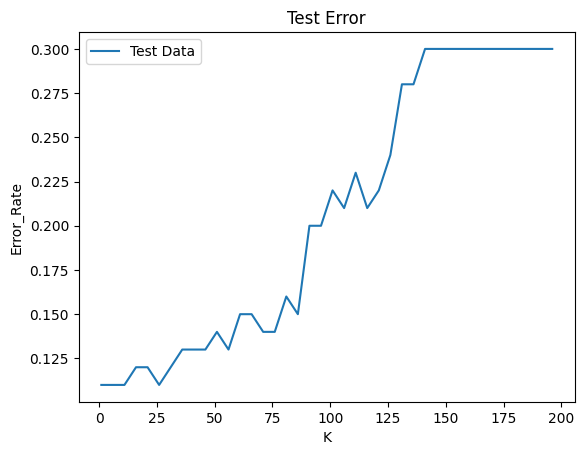

[ 1  6 11 26]


In [1046]:
K = np.arange(1, 197, 5)
k_val = np.array([])
train_err = []
test_err = np.array([])
manhattan_test_error = np.array([])

for k in K:
    k_val = np.append(k_val, k)
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.set_params(n_jobs = -1,n_neighbors=k, p=1, metric ='manhattan')
    neigh.fit(x_train, y_train)
    test_pred = neigh.predict(testset)
    test_acc = accuracy_score(testLabels,test_pred)
    manhattan_test_error = np.append(manhattan_test_error, (np.mean(test_pred != testLabels)))   
error_table = pd.DataFrame(np.column_stack([k_val, manhattan_test_error]),
                             columns=['K',  'Error_Rate'])
print('Test error summary')
print(error_table)
K = np.array(K)
K = K[np.where(manhattan_test_error == manhattan_test_error.min())]
print('The corresponding K value is {}'.format(K))
ANS = np.min(error_table.Error_Rate)
print('Minimum test error is {} '.format(ANS))

#Graph Plot
plt.gca()
plt.xlabel('K')
plt.ylabel('Error_Rate')
plt.plot(k_val, manhattan_test_error, label = 'Test Data')
plt.legend()
plt.title('Test Error')
plt.show()
print(K)


B. with log 10 ( p ) ∈ { 0 . 1 , 0 . 2 , 0 . 3 , . . . , 1 } . In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 ( p )?

[ 1  6 11 26]
1
      log10P  Test_Error
0   1.258925        0.13
1   1.584893        0.13
2   1.995262        0.13
3   2.511886        0.14
4   3.162278        0.14
5   3.981072        0.12
6   5.011872        0.11
7   6.309573        0.11
8   7.943282        0.11
9  10.000000        0.11
Test error summary
Test_error for manhattan:  0.10999999999999999
6
      log10P  Test_Error
0   1.258925        0.09
1   1.584893        0.09
2   1.995262        0.08
3   2.511886        0.08
4   3.162278        0.08
5   3.981072        0.06
6   5.011872        0.07
7   6.309573        0.08
8   7.943282        0.09
9  10.000000        0.09
Test error summary
Test_error for manhattan:  0.06000000000000005
11
      log10P  Test_Error
0   1.258925        0.11
1   1.584893        0.11
2   1.995262        0.12
3   2.511886        0.12
4   3.162278        0.12
5   3.981072        0.12
6   5.011872        0.12
7   6.309573        0.11
8   7.943282        0.11
9  10.000000        0.11
Test error summary
Tes

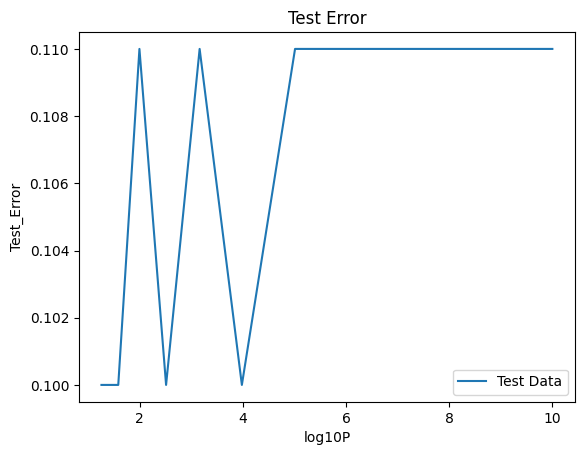

In [1047]:
print(K)
P = np.logspace(0.1, 1, 10)
p_values = np.linspace(0.1, 1, 10)
test_err = {}
for k in K:
    test_err[k] = []
    
    for p in P:
        
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(x_train, y_train)
        test_pred = knn.predict(testset)
        test_acc = accuracy_score(testLabels,test_pred)
        test_err[k].append(1-test_acc)

for k in K:
    print(k)
    print(pd.DataFrame(list(zip(P, test_err[k])), columns = ['log10P','Test_Error']))
    print('Test error summary')
    print('Test_error for manhattan: ', min(test_err[k]))
        
#Graph Plot
plt.gca()
plt.xlabel('log10P')
plt.ylabel('Test_Error')
plt.plot(P, test_err[k], label = 'Test Data')
plt.legend()
plt.title('Test Error')
plt.show()


In [1048]:
test_analysis = pd.DataFrame(list(zip(p_values, test_err[6], P, [6 for i in range(len(p_values))])), columns = ['p','Test_Error', 'log10P', 'K'])
print(test_analysis)
min_test_err = test_analysis.loc[test_analysis['Test_Error'] == test_analysis['Test_Error'].min(), ['Test_Error', 'log10P', 'K']]
min_test_err

     p  Test_Error     log10P  K
0  0.1        0.09   1.258925  6
1  0.2        0.09   1.584893  6
2  0.3        0.08   1.995262  6
3  0.4        0.08   2.511886  6
4  0.5        0.08   3.162278  6
5  0.6        0.06   3.981072  6
6  0.7        0.07   5.011872  6
7  0.8        0.08   6.309573  6
8  0.9        0.09   7.943282  6
9  1.0        0.09  10.000000  6


,Test_Error,log10P,K
5,0.06,3.981072,6


C. which becomes Chebyshev Distance with p → ∞

test error summary
      K  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.18
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30
Test_error for chebyshev:  0.07999999999999996
Best value of k for chebyshev:  16


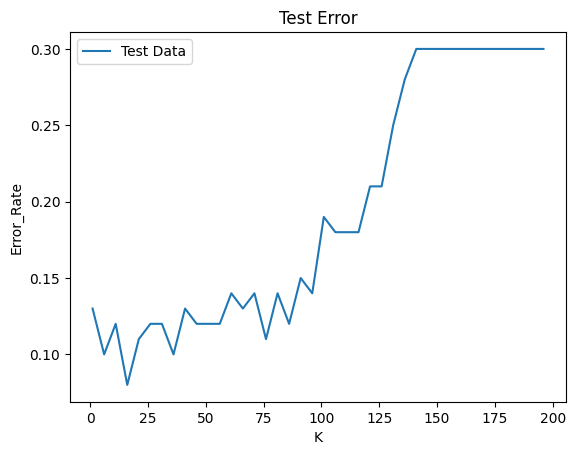

In [1049]:
# chebyshev
K = np.arange(1, 200, 5)
test_err = []
for k in K:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.set_params(n_jobs = -1,n_neighbors=k, metric ='chebyshev') 
    neigh.fit(x_train, y_train)
    test_pred = neigh.predict(testset)
    test_acc = accuracy_score(testLabels,test_pred)
    precision = precision_score(testLabels, test_pred)
    f1 = f1_score(testLabels, test_pred)
    test_err.append(1-test_acc)
test_analysis = pd.DataFrame(list(zip(K,test_err)), columns = ['K', 'Test Error'])
print('test error summary')
print(test_analysis)
print('Test_error for chebyshev: ', min(test_err))
print('Best value of k for chebyshev: ', K[np.argmin(test_err)])

# graph plot
plt.gca()
plt.xlabel('K')
plt.ylabel('Error_Rate')
plt.title('Test Error')
plt.plot(K, test_err, label = 'Test Data')
plt.legend()
plt.show()


ii.Mahalanobis Distance.


Test error summary
      K  TestError
0     1       0.16
1     6       0.16
2    11       0.19
3    16       0.18
4    21       0.20
5    26       0.18
6    31       0.20
7    36       0.20
8    41       0.21
9    46       0.22
10   51       0.22
11   56       0.21
12   61       0.22
13   66       0.22
14   71       0.23
15   76       0.23
16   81       0.26
17   86       0.23
18   91       0.23
19   96       0.24
20  101       0.24
21  106       0.23
22  111       0.23
23  116       0.26
24  121       0.29
25  126       0.30
26  131       0.30
27  136       0.30
28  141       0.30
29  146       0.30
30  151       0.30
31  156       0.30
32  161       0.30
33  166       0.30
34  171       0.30
35  176       0.30
36  181       0.30
37  186       0.30
38  191       0.30
39  196       0.30


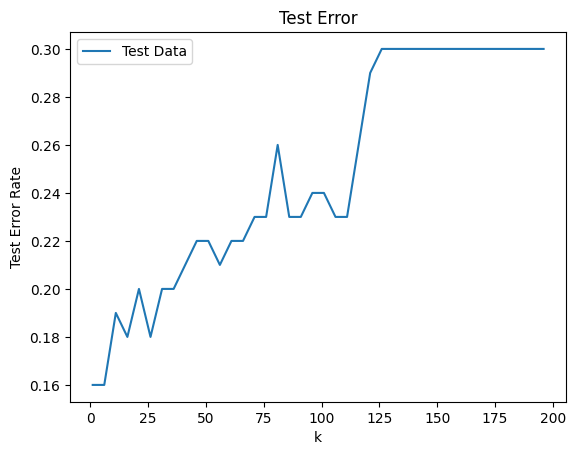

Test_error for mahalanobis:  0.16000000000000003
Best value of k for mahalanobis:  1


In [1050]:
# https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python
K = np.arange(1, 200, 5)
VI = np.linalg.inv(np.cov(x_train, rowvar = False))
test_err = []
for k in K:
    test_err_no = 0
    neigh= neighbors.KNeighborsClassifier(n_jobs = -1,n_neighbors=k, algorithm='brute', metric='mahalanobis',metric_params={'VI': VI})
    neigh.fit(x_train, y_train)
    test_pred = neigh.predict(testset)
    test_acc = accuracy_score(testLabels,test_pred)
    precision = precision_score(testLabels, test_pred)
    f1 = f1_score(testLabels, test_pred)
    test_err.append(1-test_acc)
test_analysis = pd.DataFrame(list(zip(K,test_err)), columns = ['K', 'TestError'])
print('Test error summary')
print(test_analysis)

# draw plot
plt.gca()
plt.xlabel('k') 
plt.ylabel('Test Error Rate')
plt.title('Test Error')
plt.plot(K, test_err, label = 'Test Data')
plt.legend()
plt.show()

print('Test_error for mahalanobis: ', min(test_err))
print('Best value of k for mahalanobis: ', K[np.argmin(test_err)])



e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ { 1 , 6 , 11 , 16 , . . . , 196 } .

test summary
      K  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.11
4    21        0.11
5    26        0.11
6    31        0.11
7    36        0.11
8    41        0.11
9    46        0.11
10   51        0.11
11   56        0.11
12   61        0.11
13   66        0.11
14   71        0.11
15   76        0.12
16   81        0.12
17   86        0.13
18   91        0.14
19   96        0.14
20  101        0.12
21  106        0.14
22  111        0.14
23  116        0.13
24  121        0.13
25  126        0.13
26  131        0.14
27  136        0.14
28  141        0.17
29  146        0.19
30  151        0.19
31  156        0.20
32  161        0.23
33  166        0.25
34  171        0.27
35  176        0.27
36  181        0.27
37  186        0.27
38  191        0.28
39  196        0.28


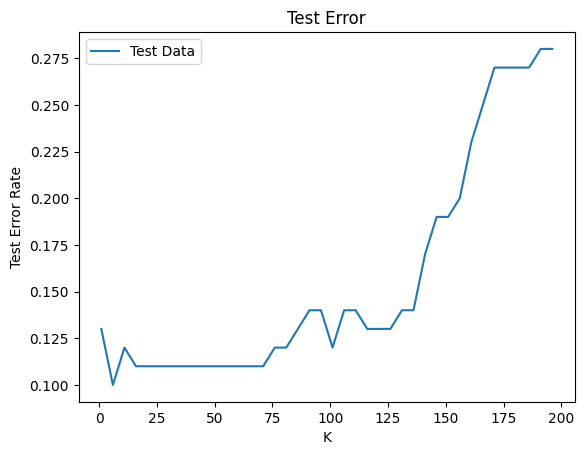

Test_error for euclidean:  0.09999999999999998
Best value of k for euclidean:  6


In [1051]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# euclidean
K = range(1, 200, 5)
test_err = []

for k in K:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.set_params(n_neighbors=k, weights= 'distance', p =2, n_jobs=-1)    
    neigh.fit(x_train, y_train)
    test_pred = neigh.predict(testset)
    test_acc = accuracy_score(testLabels, test_pred)
    test_err.append(1-test_acc)
test_analysis = pd.DataFrame(list(zip(K,test_err)), columns = ['K', 'Test Error'])
print('test summary')
print(test_analysis)
# draw plot
plt.gca()
plt.xlabel('K') 
plt.ylabel('Test Error Rate')
plt.title('Test Error')
plt.plot(K, test_err, label = 'Test Data')
plt.legend()
plt.show()

print('Test_error for euclidean: ', min(test_err))
print('Best value of k for euclidean: ', K[np.argmin(test_err)])


      K  TestError
0     1       0.11
1     6       0.11
2    11       0.11
3    16       0.12
4    21       0.11
5    26       0.10
6    31       0.11
7    36       0.11
8    41       0.11
9    46       0.11
10   51       0.12
11   56       0.12
12   61       0.13
13   66       0.13
14   71       0.11
15   76       0.12
16   81       0.14
17   86       0.14
18   91       0.13
19   96       0.13
20  101       0.15
21  106       0.15
22  111       0.15
23  116       0.15
24  121       0.15
25  126       0.15
26  131       0.15
27  136       0.16
28  141       0.17
29  146       0.18
30  151       0.19
31  156       0.21
32  161       0.24
33  166       0.25
34  171       0.27
35  176       0.27
36  181       0.27
37  186       0.27
38  191       0.28
39  196       0.29


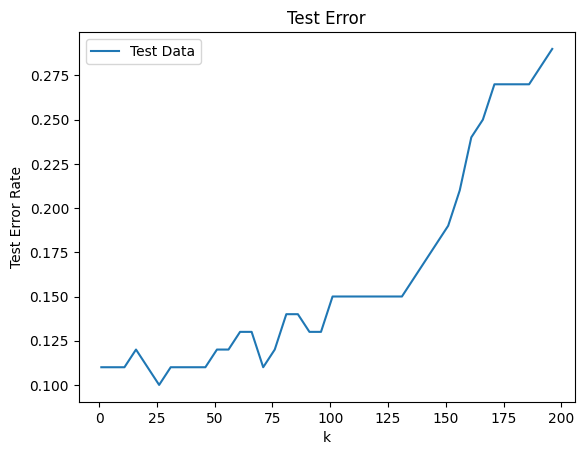

Test_error for manhattan:  0.09999999999999998
Best value of k for manhattan:  26


In [1052]:
# manhattan
test_err = []

for k in K:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.set_params(n_neighbors=k,p=1, weights='distance', n_jobs =-1)
    neigh.fit(x_train, y_train)
    
    test_pred = neigh.predict(testset)
    
    test_acc = accuracy_score(testLabels, test_pred)
    
    test_err.append(1-test_acc)

test_analysis = pd.DataFrame(list(zip(K,test_err)), columns = ['K', 'TestError'])
print(test_analysis)
# draw plot
plt.gca()
plt.xlabel('k') 
plt.ylabel('Test Error Rate')
plt.title('Test Error')
plt.plot(K, test_err, label = 'Test Data')
plt.legend()
plt.show()

print('Test_error for manhattan: ', min(test_err))
print('Best value of k for manhattan: ', K[np.argmin(test_err)])


      K  TestError
0     1       0.13
1     6       0.13
2    11       0.12
3    16       0.11
4    21       0.12
5    26       0.12
6    31       0.11
7    36       0.11
8    41       0.11
9    46       0.12
10   51       0.12
11   56       0.12
12   61       0.11
13   66       0.13
14   71       0.12
15   76       0.12
16   81       0.12
17   86       0.14
18   91       0.13
19   96       0.14
20  101       0.14
21  106       0.14
22  111       0.14
23  116       0.14
24  121       0.15
25  126       0.14
26  131       0.16
27  136       0.16
28  141       0.18
29  146       0.19
30  151       0.21
31  156       0.21
32  161       0.23
33  166       0.26
34  171       0.26
35  176       0.26
36  181       0.27
37  186       0.27
38  191       0.27
39  196       0.28


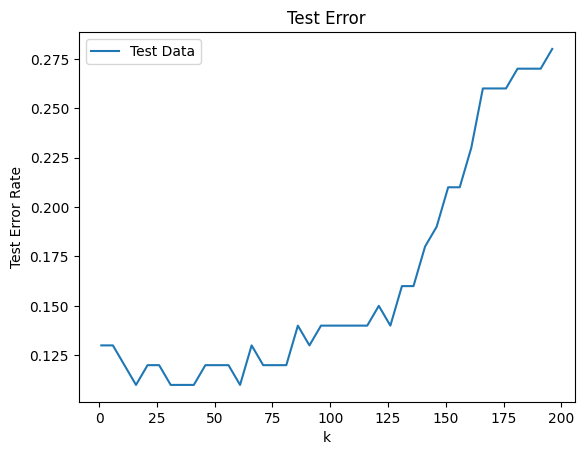

Test_error for chebyshev:  0.10999999999999999
Best value of k for chebyshev:  16


In [1053]:
#chebyshev
test_err = []

for k in K:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs = -1, p = math.inf, weights='distance')
    knn.fit(x_train, y_train)
    test_pred = knn.predict(testset)
    test_acc = accuracy_score(testLabels, test_pred)
    test_err.append(1-test_acc)

test_analysis = pd.DataFrame(list(zip(K,test_err)), columns = ['K', 'TestError'])
print(test_analysis)
# draw plot
plt.gca()
plt.xlabel('k') 
plt.ylabel('Test Error Rate')
plt.title('Test Error')
plt.plot(K, test_err, label = 'Test Data')
plt.legend()
plt.show()

print('Test_error for chebyshev: ', min(test_err))
print('Best value of k for chebyshev: ', K[np.argmin(test_err)])



The lowest training error obtained is 0 for K=1.